<a href="https://colab.research.google.com/github/NataliaOsiecka/IR12BBAA/blob/master/IR_ML_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd '/content/drive/My Drive/IR_ML'

/content/drive/My Drive/IR_ML


In [2]:
ls

12BBAAT100P0.CSV  12BBAAT108P0.CSV  12BBAAT116P0.CSV  12BBAAT93P0.CSV
12BBAAT101P0.CSV  12BBAAT109P0.CSV  12BBAAT117P0.CSV  12BBAAT94P0.CSV
12BBAAT102P0.CSV  12BBAAT110P0.CSV  12BBAAT118P0.CSV  12BBAAT95P0.CSV
12BBAAT103P0.CSV  12BBAAT111P0.CSV  12BBAAT119P0.CSV  12BBAAT96P0.CSV
12BBAAT104P0.CSV  12BBAAT112P0.CSV  12BBAAT120P0.CSV  12BBAAT97P0.CSV
12BBAAT105P0.CSV  12BBAAT113P0.CSV  12BBAAT90P0.CSV   12BBAAT98P0.CSV
12BBAAT106P0.CSV  12BBAAT114P0.CSV  12BBAAT91P0.CSV   12BBAAT99P0.CSV
12BBAAT107P0.CSV  12BBAAT115P0.CSV  12BBAAT92P0.CSV


In [0]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [4]:
filenames=(glob.glob('12BBAAT*.CSV', recursive=True))
print(filenames)

df=np.zeros((1869,32))
temperature=[]

for i, item in enumerate(filenames):
    t=item[7:]
    temp=t[:-6]
    temperature.append(temp)
    data=np.loadtxt(item, delimiter=',')
    if data.shape[0]<1869:
        for j,it in enumerate(data[:,1]):
            df[j,i+1]=it
    else:
        df[:,i+1]=data[:,1]
        df[:,0]=data[:,0]

df_new=df[125:1505,:]

pd_df=pd.DataFrame(data=df_new[:,1:], 
                   index=df_new[:,0],
                   columns=temperature)

['12BBAAT120P0.CSV', '12BBAAT119P0.CSV', '12BBAAT118P0.CSV', '12BBAAT117P0.CSV', '12BBAAT116P0.CSV', '12BBAAT115P0.CSV', '12BBAAT114P0.CSV', '12BBAAT113P0.CSV', '12BBAAT112P0.CSV', '12BBAAT111P0.CSV', '12BBAAT110P0.CSV', '12BBAAT109P0.CSV', '12BBAAT108P0.CSV', '12BBAAT107P0.CSV', '12BBAAT106P0.CSV', '12BBAAT105P0.CSV', '12BBAAT104P0.CSV', '12BBAAT103P0.CSV', '12BBAAT102P0.CSV', '12BBAAT101P0.CSV', '12BBAAT100P0.CSV', '12BBAAT99P0.CSV', '12BBAAT98P0.CSV', '12BBAAT97P0.CSV', '12BBAAT96P0.CSV', '12BBAAT95P0.CSV', '12BBAAT94P0.CSV', '12BBAAT93P0.CSV', '12BBAAT92P0.CSV', '12BBAAT91P0.CSV', '12BBAAT90P0.CSV']


In [0]:
df_norm = (pd_df-pd_df.min())/(pd_df.max()-pd_df.min())


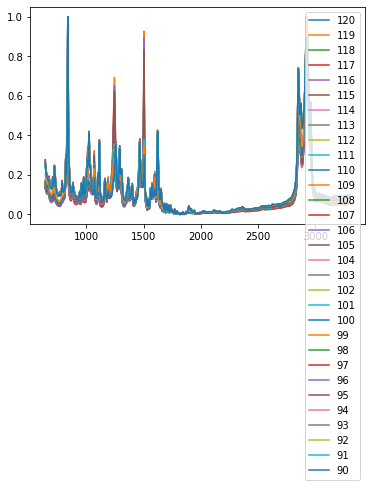

In [14]:
df_norm.plot()

In [0]:
df_transposed = df_norm.T

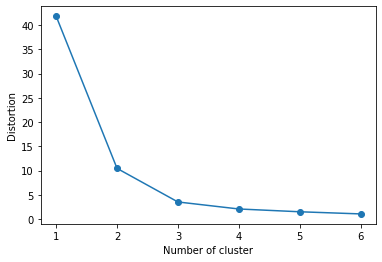

In [16]:
distortions = []
for i in range(1,7):
  km = KMeans(n_clusters = i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(df_transposed)
  distortions.append(km.inertia_)

plt.plot(range(1,7), distortions, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

In [17]:
km4 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.00001, random_state=0)
y_km4=km4.fit_predict(df_transposed)
y_km4


array([2, 2, 2, 2, 2, 2, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [18]:
km3 = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=0.0001, random_state=0)
y_km3=km3.fit_predict(df_transposed)
y_km3
#km3.inertia_

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

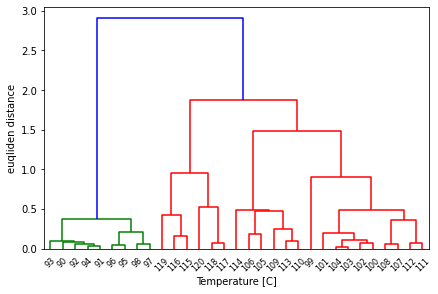

In [19]:
row_clusters = linkage(df_transposed.values, method='complete', metric='euclidean')
labels = df_transposed.index.values
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('euqliden distance')
plt.xlabel('Temperature [C]')
plt.show()

In [20]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=50, n_init=10, max_no_improvement=10, verbose=0 )
y_mbk = mbk.fit_predict(df_transposed)
y_mbk

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [21]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=4, batch_size=50, n_init=10, max_no_improvement=10, verbose=0 )
y_mbk = mbk.fit_predict(df_transposed)
y_mbk

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [0]:
df_std = (pd_df-pd_df.mean())/(pd_df.std())


In [0]:
df_trans = df_std.T

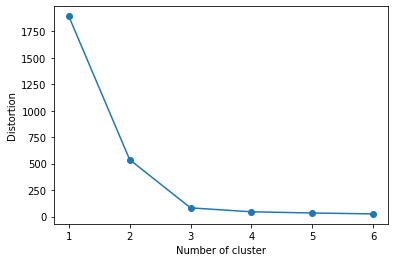

In [25]:
distortions = []
for i in range(1,7):
  km = KMeans(n_clusters = i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(df_trans)
  distortions.append(km.inertia_)

plt.plot(range(1,7), distortions, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

In [27]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=50, n_init=10, max_no_improvement=10, verbose=0 )
y_mbk = mbk.fit_predict(df_trans)
y_mbk

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [28]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=4, batch_size=50, n_init=10, max_no_improvement=10, verbose=0 )
y_mbk = mbk.fit_predict(df_trans)
y_mbk

array([0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [32]:
from sklearn import decomposition
df_t = pd_df.T
pca = decomposition.PCA(n_components=2)
pca.fit(df_t)
pca_df = pca.transform(df_t)
pca_df.shape

(31, 2)

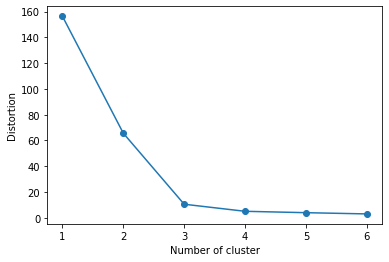

In [33]:
distortions = []
for i in range(1,7):
  km = KMeans(n_clusters = i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(df_t)
  distortions.append(km.inertia_)

plt.plot(range(1,7), distortions, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

In [37]:
km4 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.00001, random_state=0)
y_km4=km4.fit_predict(df_t)
y_km4


array([1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [38]:
km3 = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=0.0001, random_state=0)
y_km3=km3.fit_predict(df_t)
y_km3
#km3.inertia_

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

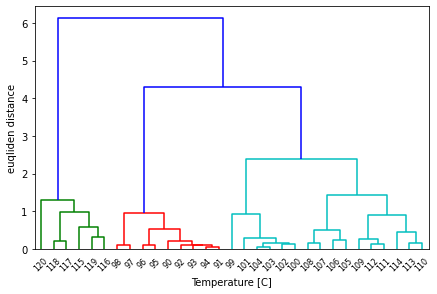

In [39]:
row_clusters = linkage(df_t.values, method='complete', metric='euclidean')
labels = df_t.index.values
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('euqliden distance')
plt.xlabel('Temperature [C]')
plt.show()

In [40]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=50, n_init=10, max_no_improvement=10, verbose=0 )
y_mbk = mbk.fit_predict(df_t)
y_mbk

array([0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [41]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=4, batch_size=50, n_init=10, max_no_improvement=10, verbose=0 )
y_mbk = mbk.fit_predict(df_t)
y_mbk

array([0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)